# Přírůstková analýza

---

Vypracoval: Daniel **BERÁNEK**

Předmět: **132PRPM** - Přetváření a porušování materiálů

---

**Koeficienty:**

a = 1.2

b = 1.4

c = 0.8

---

<img src="img/zadani.png" style="margin:auto">
<p style="text-align:center">Obrázek 1: Statické schéma, schéma průřezu</p>


Rám na obrázku má konstantní průřez tvaru T o rozměrech $B = (200+ 40b) \, \mathrm{mm}$, $H = (300+ 100a) \, \mathrm{mm}$, $t_1 = 40 \, \mathrm{mm}$ a $t_2 = 25 \, \mathrm{mm}$ a je vyroben z materiálu, jehož chování lze popsat ideálně pružnoplastickým modelem s mezí kluzu $\sigma_0 = (200 + 120c) \, \mathrm{MPa}$ a modulem pružnosti $E = 210 \, \mathrm{GPa}$. Nosník je zatížen dvěma osamělými silami o velikostech $F_2 = \mu (100 + 100c) \, \mathrm{kN}$ a $F3 = \mu (200 + 100a) \, \mathrm{kN}$, kde $\mu$ je součinitel zatížení. Rozměry nosníku a působiště vnějších sil jsou okótovány na obrázku, přičemž $L_1 = (2 + b) \, \mathrm{m}$, $L_2 = (3 + c) \, \mathrm{m}$, $H_1 = (3 + a) \, \mathrm{m}$ a $H_2 = (2 + b) \, \mathrm{m}$.


Jedná se o stejný rám jako v úkolu na mezní analýzu, ale tentokrát se bude chování při postupném přitěžování vyšetřovat přírůstkovou analýzou. Vyjděte z předpokladu, že dokud ohybový moment v průřezu nedosáhne hodnoty mezního plastického momentu, lze uvažovat vztah mezi momentem a křivostí podle pružnosti. Při dosažení mezního plastického momentu v příslušném průřezu vzniká plastický kloub a při dalším zatěžování už zde moment neroste.

Součinitel zatížení $\mu$ se postupně zvětšuje až do dosažení mezního plastického stavu konstrukce. Vyšetřete tento proces přírůstkovou metodou. Určete hodnotu součinitele zatížení $\mu_{el}$ v okamžiku, kdy v nejvíc namáhaném místě konstrukce začne plastické přetváření, $\mu_1$ při vzniku prvního plastického kloubu, $\mu_2$ při vzniku druhého plastického kloubu atd., až do plastického kolapsu celé konstrukce. Dále určete patrový posun u a svislý posun (průhyb) $w_3$ pod působící silou $F_3$ v okamžicích vzniku jednotlivých plastických kloubů a vykreslete dva grafy, ve kterých bude na svislé ose součinitel zatížení $\mu$ a na vodorovné ose v jednom grafu patrový posun $u$ a ve druhém průhyb $w_3$.
V intervalech mezi jednotlivými plastickými klouby soustředěnými do průřezů s mezním plastickým momentem uvažujte chování jako lineárně pružné
a zanedbejte změnu délky střednice způsobenou normálovými silami, tj. počítejte zjednodušenou deformační metodou. Zanedbejte také vliv normálové síly na moment v mezním plastickém stavu průřezu.

Pro kontrolu budete potřebovat polohu neutrální osy a ohybový moment v mezním pružném a mezním plastickém stavu průřezu, součinitel zatížení na začátku plastického přetváření, součinitel zatížení v okamžiku vzniku prvního plastického kloubu a odpovídající patrový posun, styčníková pootočení a průhyb pod silou $F_3$. Dále se kontroluje součinitel zatížení v mezním plastickém stavu konstrukce, tj. při vzniku takového počtu plastických kloubů, který vede ke kolapsu.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patch

import numpy as np

from shapely import Polygon

from sectionproperties.pre import Geometry, Material
from sectionproperties.analysis import Section

In [2]:
# coefficients
a = 1.2
b = 1.4
c = 0.8

In [3]:
# cross-section
B = (200 + 40*b) * 1.E-3 # m
H = (300 + 100*a) * 1.E-3  # m
t_1 = (40) * 1.E-3  # m
t_2 = (25) * 1.E-3  # m

# material
E = 210.E3  # MPa
sigma_0 = (200 + 120*c) * 1  # MPa

# load
F_2 = (100 + 100*c) # kN
F_3 = (200 + 100*a)  # kN

# structure
L_1 = 2 + b  # m
L_2 = 3 + c  # m
H_1 = 3 + a  # m
H_2 = 2 + b  # m

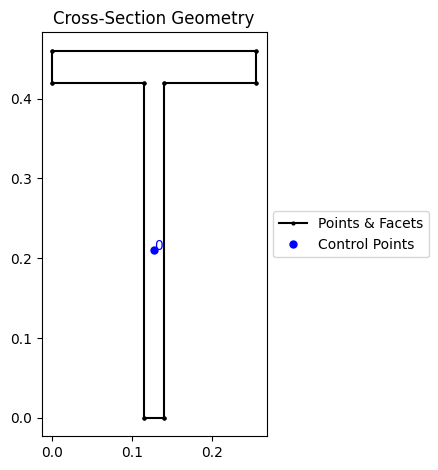

In [4]:
mat = Material(
    name='132PRPM',
    elastic_modulus=E,  # (MPa)
    poissons_ratio=0.3,
    density=7.85e-6,  # (kg/m3)
    yield_strength=sigma_0,  # (MPa)
    color='white'
)

polygon = Polygon([
    (B/2 - t_2/2, 0),
    (B/2 + t_2/2, 0),
    (B/2 + t_2/2, H),
    (B, H),
    (B, H + t_1),
    (0, H + t_1),
    (0, H),
    (B/2 - t_2/2, H)
])

geom = Geometry(geom=polygon, material=mat)

geom.plot_geometry()
plt.show()

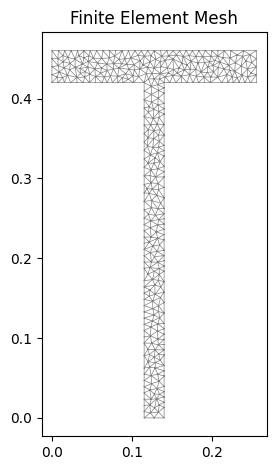

In [5]:
geom.create_mesh(mesh_sizes=[5.e-5])

section = Section(geometry=geom)
section.plot_mesh(materials=False)
plt.show()

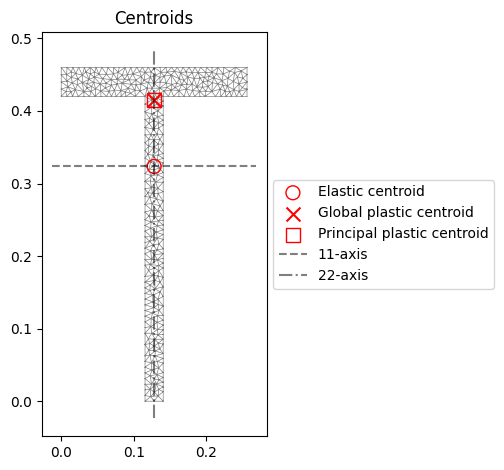

In [6]:
section.calculate_geometric_properties()
section.calculate_plastic_properties()
section.plot_centroids()
plt.show()

In [7]:
section.display_results()

     Section Properties      
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Property  ┃         Value ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ area      │  2.074000e-02 │
│ perimeter │  1.432000e+00 │
│ mass      │  1.628090e-07 │
│ e.a       │  4.355400e+03 │
│ e.qx      │  1.409226e+03 │
│ e.qy      │  5.574912e+02 │
│ e.ixx_g   │  5.462582e+02 │
│ e.iyy_g   │  8.321777e+01 │
│ e.ixy_g   │  1.803809e+02 │
│ cx        │  1.280000e-01 │
│ cy        │  3.235583e-01 │
│ e.ixx_c   │  9.029133e+01 │
│ e.iyy_c   │  1.185889e+01 │
│ e.ixy_c   │ -2.273737e-13 │
│ e.zxx+    │  6.617578e+02 │
│ e.zxx-    │  2.790573e+02 │
│ e.zyy+    │  9.264762e+01 │
│ e.zyy-    │  9.264762e+01 │
│ rx        │  1.439823e-01 │
│ ry        │  5.218048e-02 │
│ e.i11_c   │  9.029133e+01 │
│ e.i22_c   │  1.185889e+01 │
│ phi       │  0.000000e+00 │
│ e.z11+    │  6.617578e+02 │
│ e.z11-    │  2.790573e+02 │
│ e.z22+    │  9.264762e+01 │
│ e.z22-    │  9.264762e+01 │
│ r11       │  1.439823e-01 │
│ r22       │  5.218048e-02 │
│ e_eff     │  2.100000e+05 │
│ g_eff     │  8.076923e+04 │
│ nu_eff    │  3.000000e-01 │
│ x_pc      │  1.280000e-01 │
│ y_pc      │  4.148000e-01 │
│ x11_pc    │  1.280000e-01 │
│ y22_pc    │  4.148000e-01 │
│ mp_xx     │  7.130990e-01 │
│ mp_yy     │  2.134116e-01 │
│ mp_11     │  7.130990e-01 │
│ mp_22     │  2.134116e-01 │
└───────────┴───────────────┘

In [8]:
# GET CENTROIDS FROM ELASTIC & PLASTIC ANALYSIS
c_z_el = section.get_c()[1]  # (m)
c_z_pl = section.get_pc()[1] # (m)


# CALCULATE BENDING MOMENT IN ELASTIC LIMIT STATE
m_el = (sigma_0 / E) / c_z_el * section.get_eic()[0] * 1e3 # M = curvature * EI  (kNm)

# GET BENDING MOMENT IN PLASTIC LIMIT STATE
m_pl = section.get_mp()[0] * 1e3  # (kNm)

In [9]:
print('1) MEZNÍ PRUŽNÝ STAV PRŮŘEZU')
print('----------------------------')
print(f"Vzdálenost neutrální osy od spodních vláken: {c_z_el * 1.e3 :.2f} mm")
print(f"Mezní pružný moment: {m_el:.2f} kNm")
print("")
print('2) MEZNÍ PLASTICKÝ STAV PRŮŘEZU')
print('-------------------------------')
print(f"Vzdálenost neutrální osy od spodních vláken: {c_z_pl *1.e3 :.2f} mm")
print(f"Mezní plastický moment: {m_pl:.2f} kNm")

1) MEZNÍ PRUŽNÝ STAV PRŮŘEZU
----------------------------
Vzdálenost neutrální osy od spodních vláken: 323.56 mm
Mezní pružný moment: 393.34 kNm

2) MEZNÍ PLASTICKÝ STAV PRŮŘEZU
-------------------------------
Vzdálenost neutrální osy od spodních vláken: 414.80 mm
Mezní plastický moment: 713.10 kNm


In [10]:
EI = section.get_eic()[0] * 1e3  # flexural rigidity of cross-section (Nm4)

Plastický kloub v $i$-tém kroku přírůstkové metody vznikne v průřezu, pro který platí vztah:
$$
\lvert M_{pl} \rvert = \lvert M^{(i-1)} \rvert + \Delta \mu^{(i)} \cdot \lvert M^{(i)} \rvert
$$

Přírůstek součinitele zatížení lze tedy vyjádřit jako:
$$
\Delta \mu^{(i)} = \frac{\lvert M_{pl} \rvert - \lvert M^{(i-1)} \rvert}{\lvert M^{(i)} \rvert}
$$


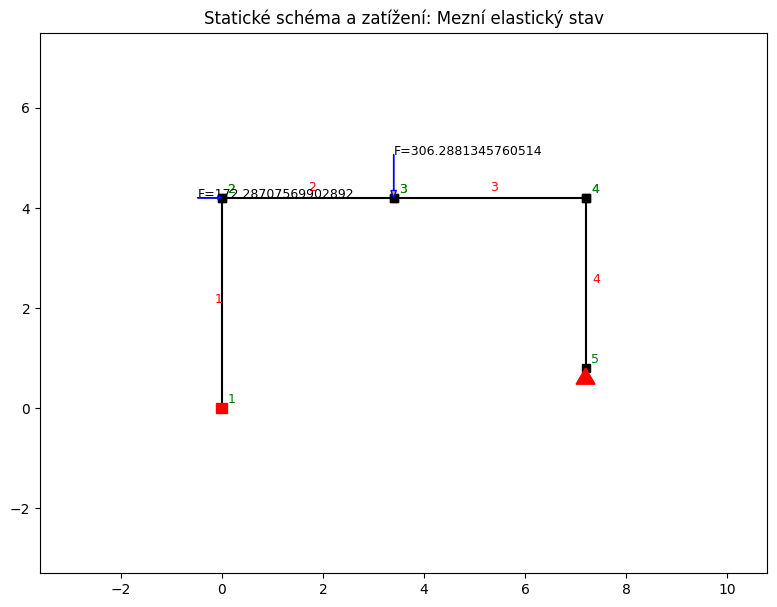

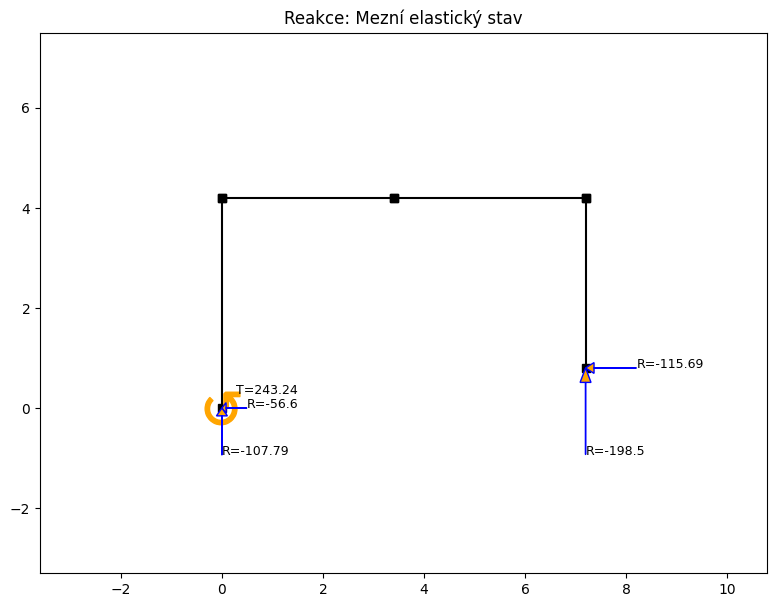

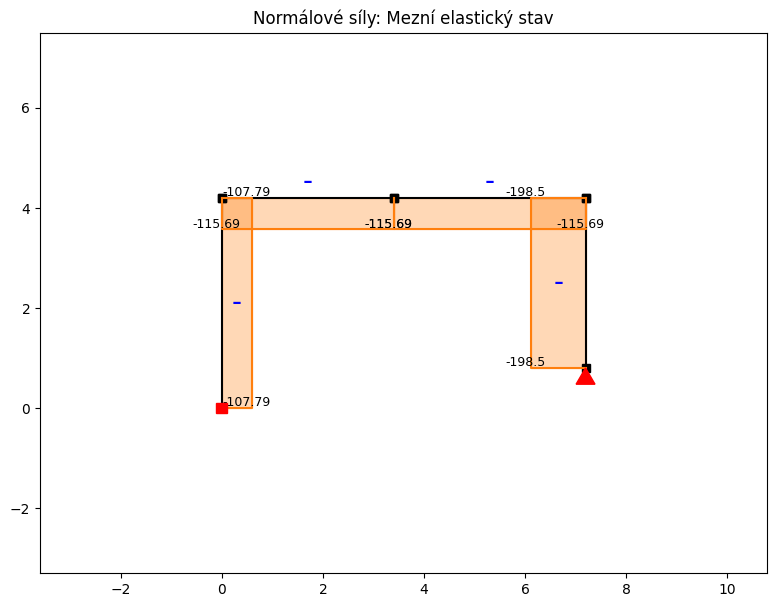

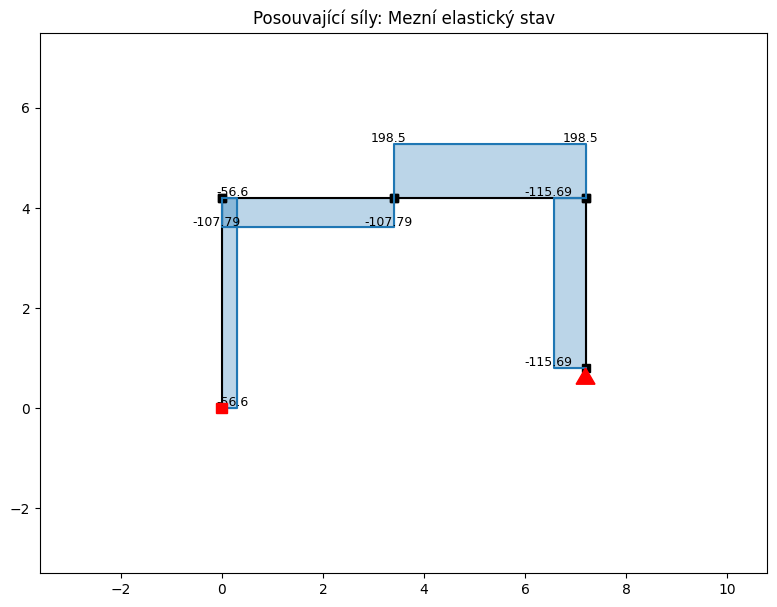

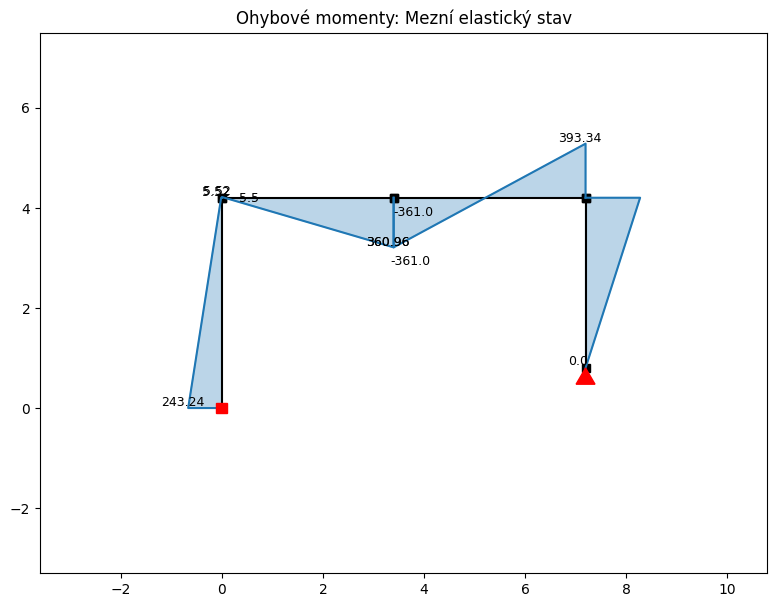

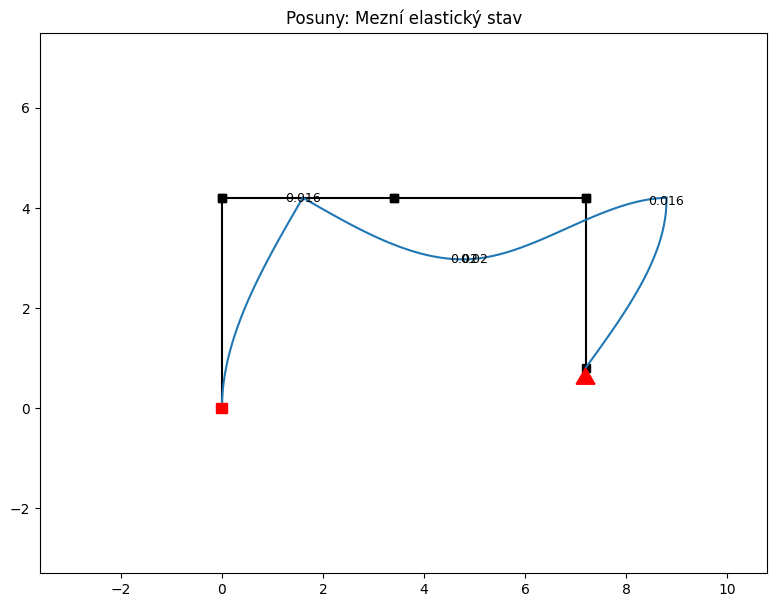

Přírůstek č. 0
--------------
	Součinitel zatížení: 0.957150

	Styčník č. 1:
		Moment ve styčníku: 243.24 kNm
		Plastický kloub: False

	Styčník č. 2:
		Moment ve styčníku: 5.52 kNm
		Plastický kloub: False

	Styčník č. 3:
		Moment ve styčníku: -360.96 kNm
		Plastický kloub: False

	Styčník č. 4:
		Moment ve styčníku: 393.34 kNm
		Plastický kloub: False

	Svislý posun styčníku č. 3: -12.20 mm
	Vodorovný posun posun styčníku č. 4: 16.02 mm



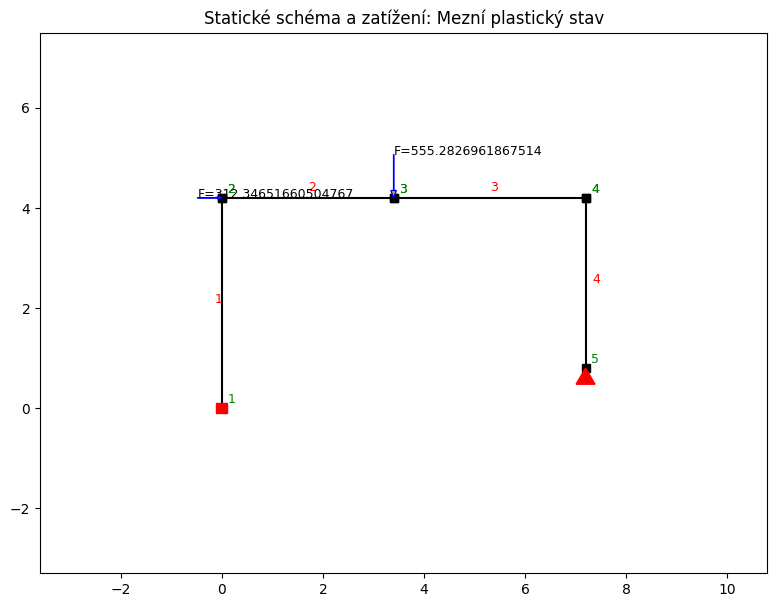

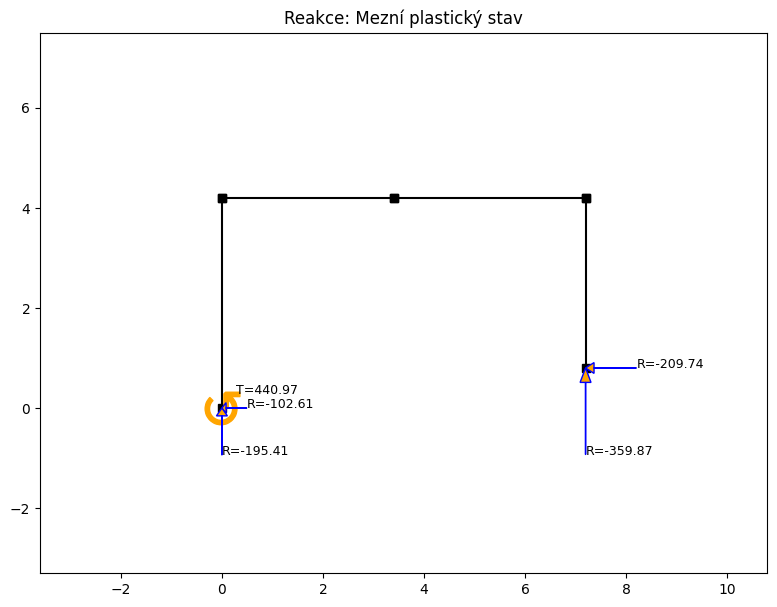

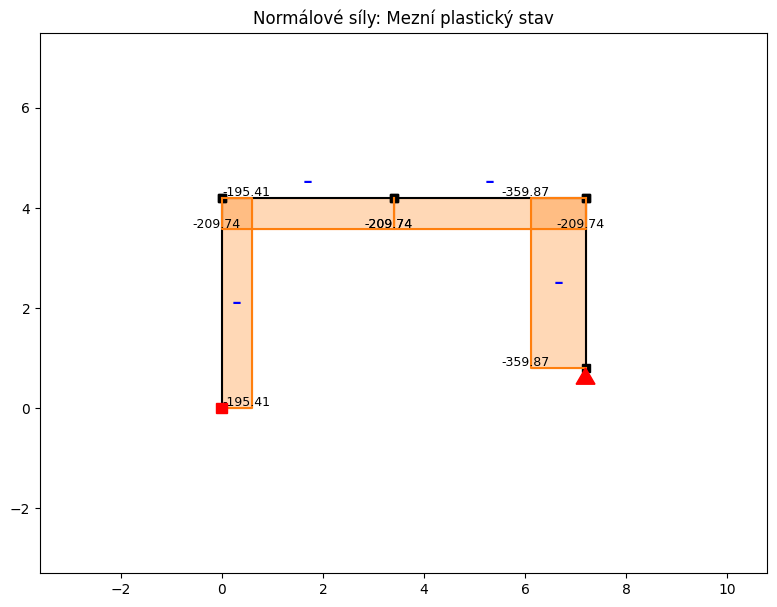

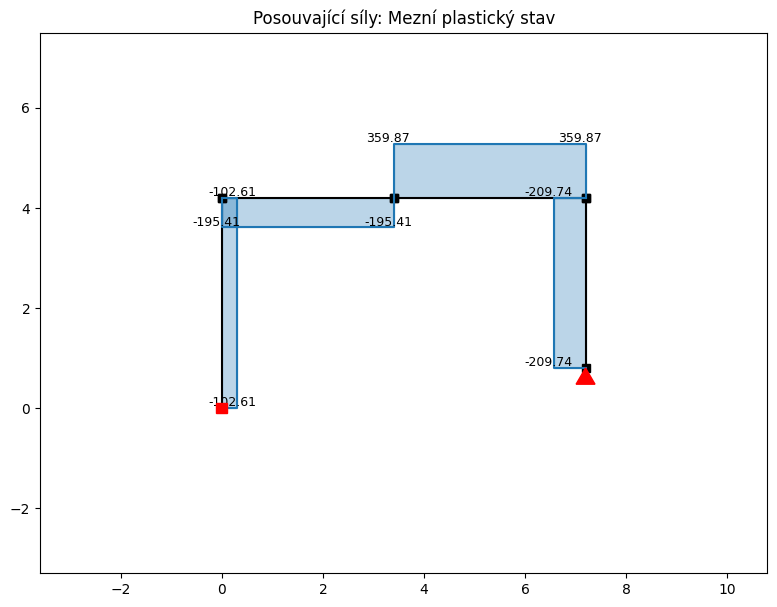

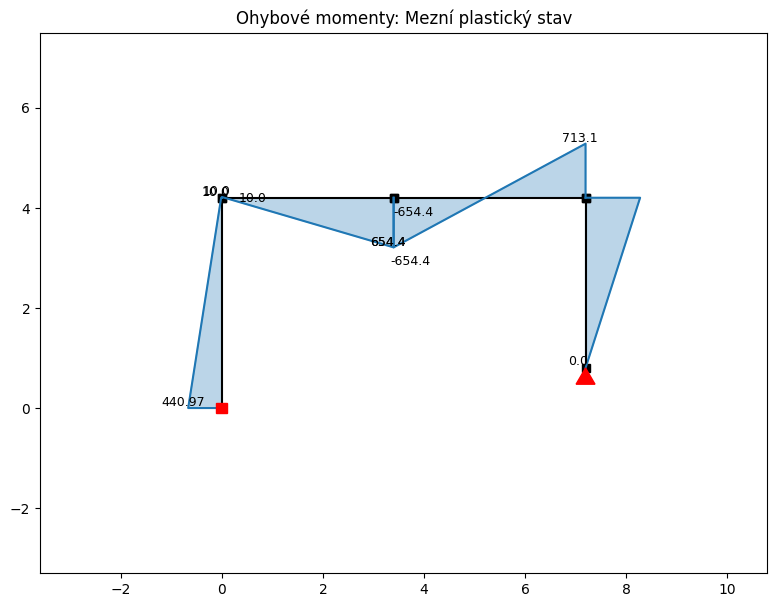

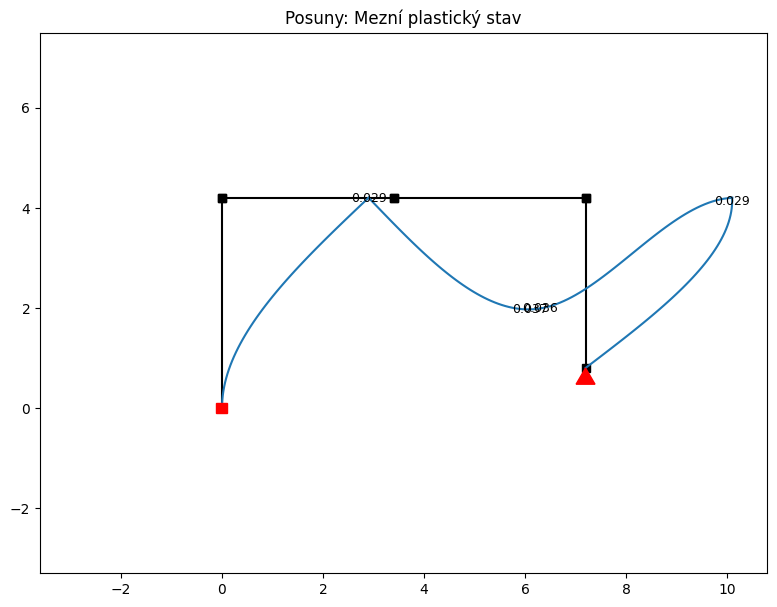

Přírůstek č. 1
--------------
	Součinitel zatížení: 1.735258

	Styčník č. 1:
		Moment ve styčníku: 440.97 kNm
		Plastický kloub: False

	Styčník č. 2:
		Moment ve styčníku: 10.00 kNm
		Plastický kloub: False

	Styčník č. 3:
		Moment ve styčníku: -654.40 kNm
		Plastický kloub: False

	Styčník č. 4:
		Moment ve styčníku: 713.10 kNm
		Plastický kloub: True

	Svislý posun styčníku č. 3: -22.13 mm
	Vodorovný posun posun styčníku č. 4: 29.04 mm



/tmp/ipykernel_8069/1320117391.py:61: RuntimeWarning: invalid value encountered in divide
  d_mu = (m_pl - abs(m_prev_at_nodes)) / abs(m_curr_at_nodes)


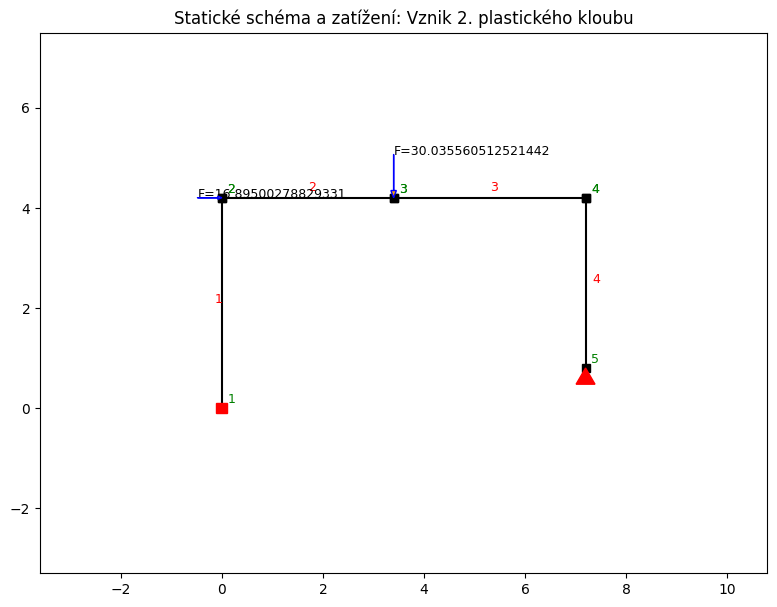

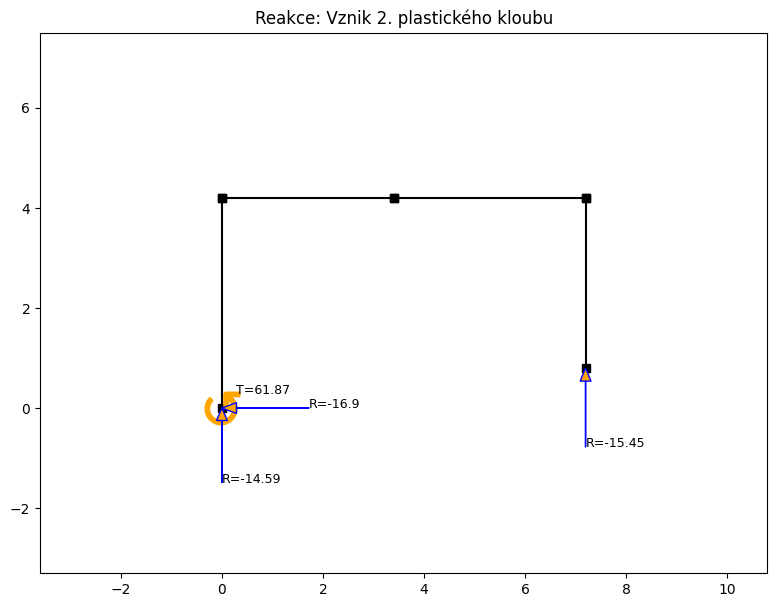

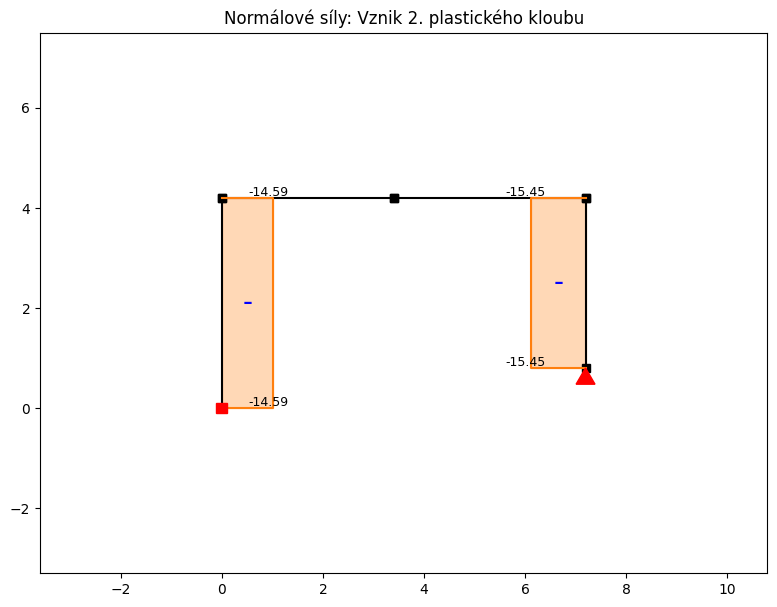

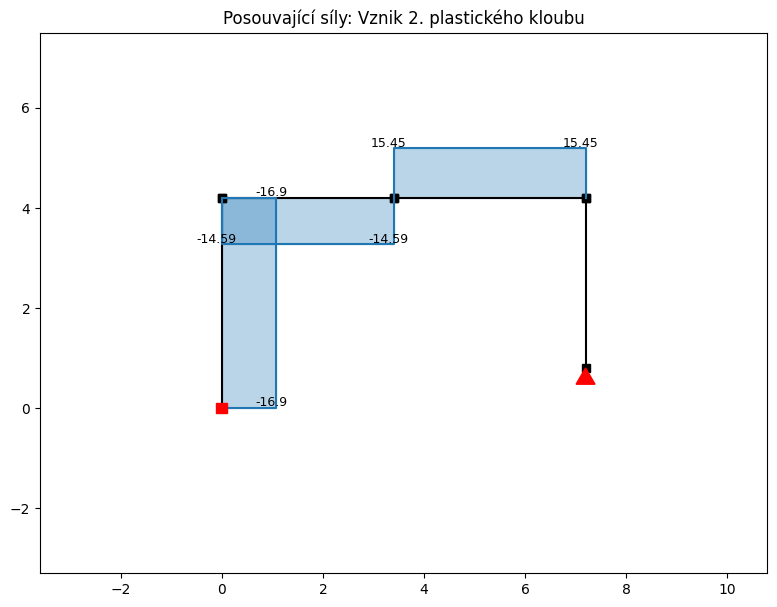

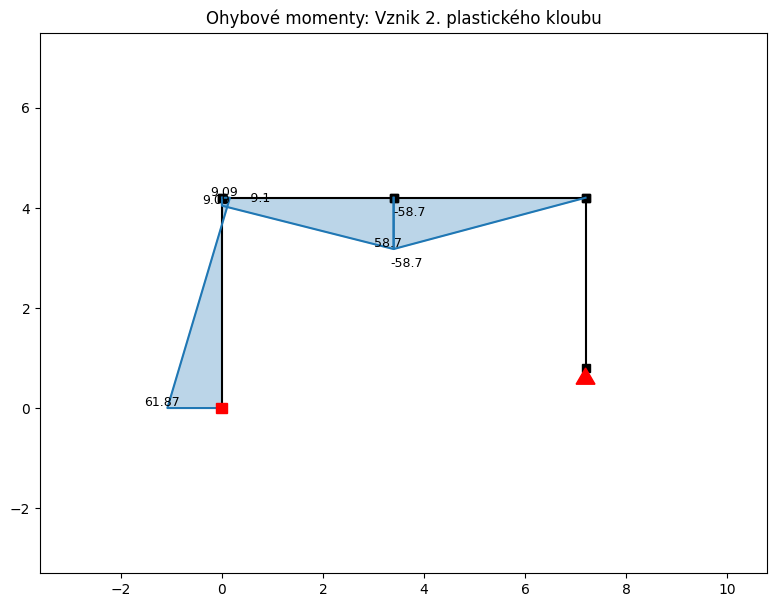

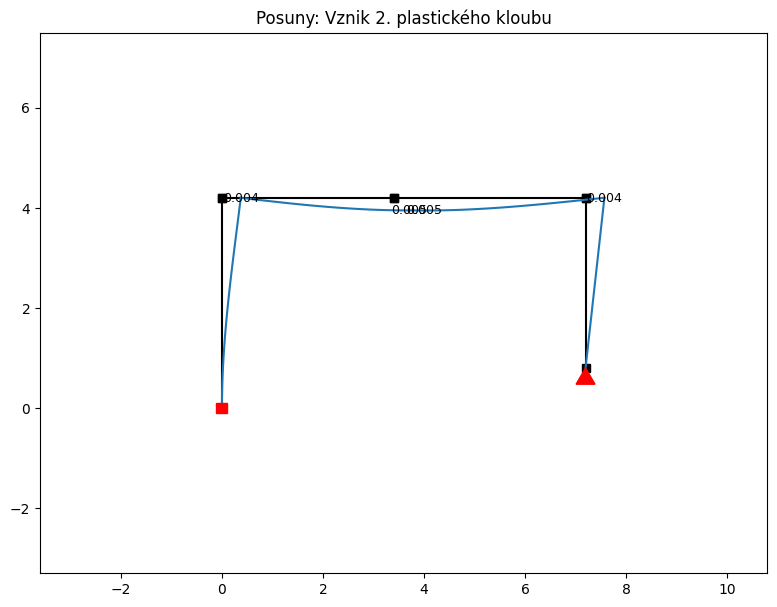

Přírůstek č. 2
--------------
	Součinitel zatížení: 1.829120

	Styčník č. 1:
		Moment ve styčníku: 502.84 kNm
		Plastický kloub: False

	Styčník č. 2:
		Moment ve styčníku: 0.91 kNm
		Plastický kloub: False

	Styčník č. 3:
		Moment ve styčníku: -713.10 kNm
		Plastický kloub: True

	Styčník č. 4:
		Moment ve styčníku: 713.10 kNm
		Plastický kloub: True

	Svislý posun styčníku č. 3: -24.66 mm
	Vodorovný posun posun styčníku č. 4: 32.78 mm



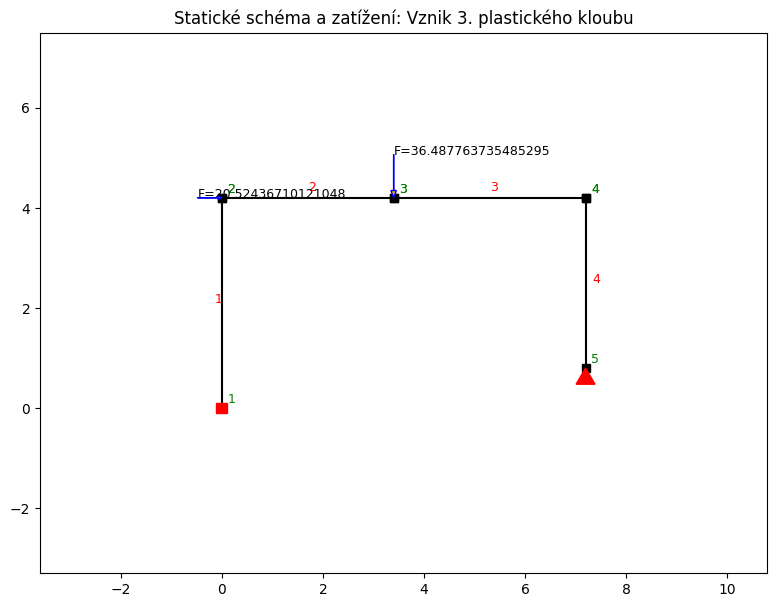

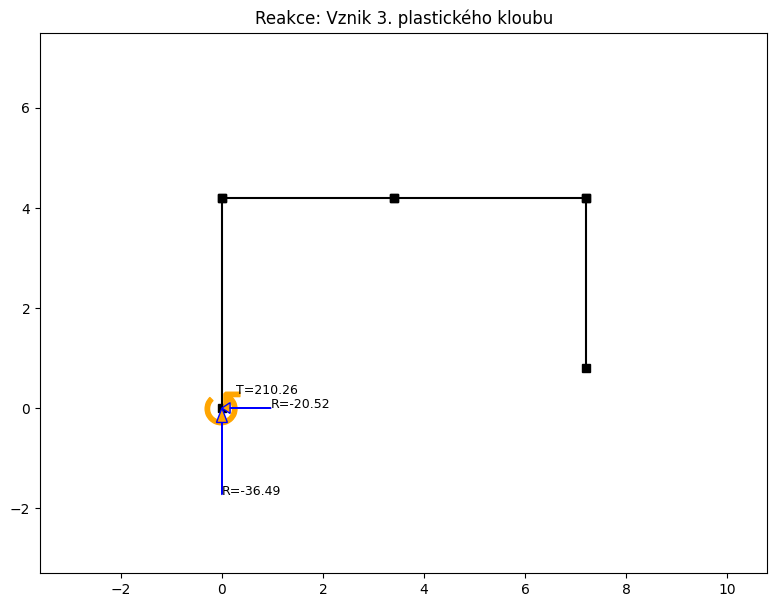

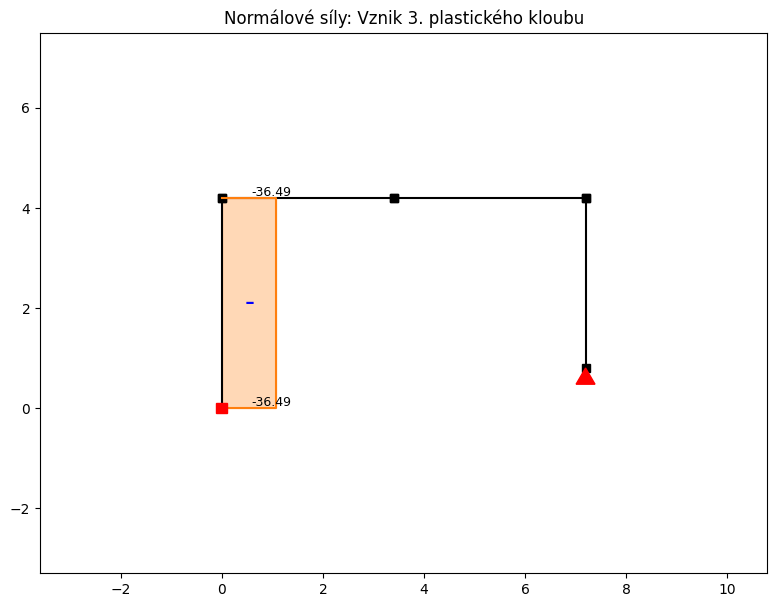

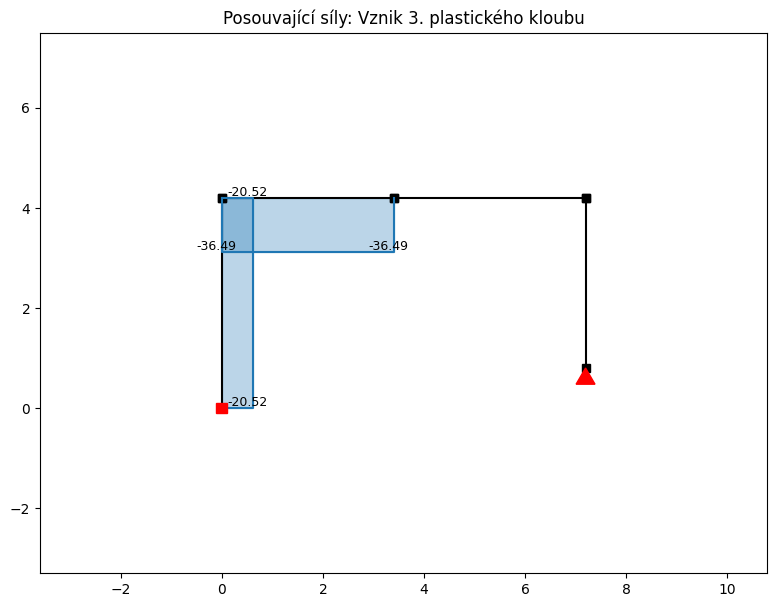

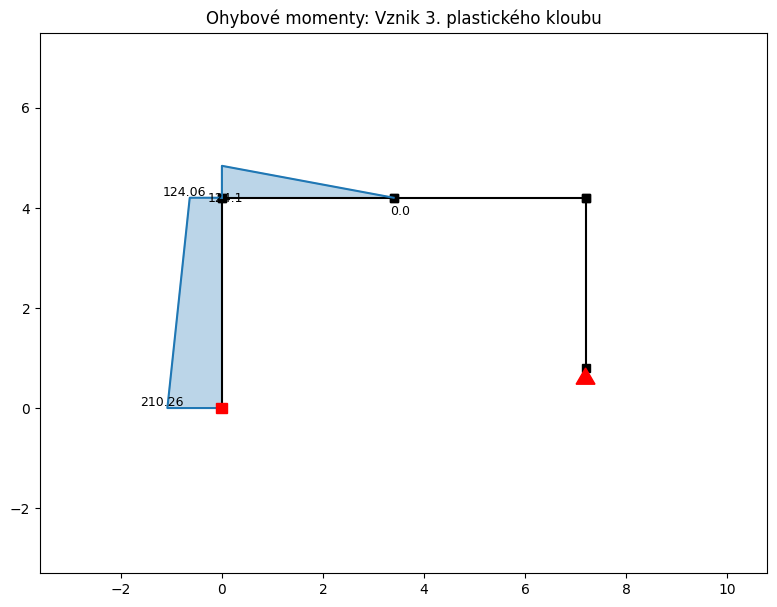

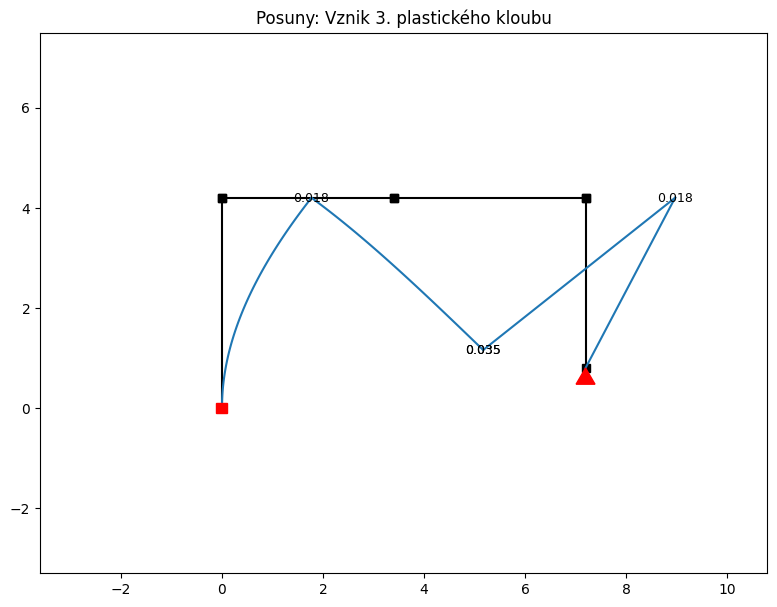

Přírůstek č. 3
--------------
	Součinitel zatížení: 1.943144

	Styčník č. 1:
		Moment ve styčníku: 713.10 kNm
		Plastický kloub: True

	Styčník č. 2:
		Moment ve styčníku: 124.97 kNm
		Plastický kloub: False

	Styčník č. 3:
		Moment ve styčníku: -713.10 kNm
		Plastický kloub: True

	Styčník č. 4:
		Moment ve styčníku: 713.10 kNm
		Plastický kloub: True

	Svislý posun styčníku č. 3: -55.07 mm
	Vodorovný posun posun styčníku č. 4: 50.51 mm



In [11]:
import anastruct as anas

locations = [
    [[0, 0], [0, H_1]],
    [[0, H_1], [L_1, H_1]],
    [[L_1, H_1], [L_1+L_2, H_1]],
    [[L_1+L_2, H_1], [L_1+L_2, H_1-H_2]]
]

moments_prev = np.zeros([4, 50])  # moments from previous iteration
moments_curr = np.zeros([4, 50])  # moments from current iteration

id_nodes = [1, 2, 3, 4]  # plastic hinge can occur at the first node of any element

is_plastic_hinge = [False, False, False, False]  # flags for plastic hinge

# initialise empty lists for storing values
u_floor = [0]
w_3 = [0]
moments = []
load_factors = [0]

for i in range(4):

    # ===================== SOLVE FOR delta_mu =====================
    
    ss = anas.SystemElements(EA=10e10, EI=EI)
    
    for (loc, pl_hinge) in zip(locations, is_plastic_hinge):
        if pl_hinge:
            # add hinge to the first node of an element
            ss.add_element(location=loc, spring={1: 0})
        else:
            ss.add_element(location=loc)
    
    # add supports
    ss.add_support_fixed(node_id=1)
    ss.add_support_hinged(node_id=5)
    
    
    # add point load
    ss.point_load(Fx=F_2, node_id=2)
    ss.point_load(Fz=-F_3, node_id=3)
    
    # solve the system
    ss.solve()
    
    # store bending moment along all members
    for j, result in enumerate(ss.get_element_results(verbose=True)):
        moments_curr[j, :] = result['M']

    # get moments in first node of every element
    m_prev_at_nodes = moments_prev[:, 0]
    m_curr_at_nodes = moments_curr[:, 0]
    
    # calculate load factor
    if i == 0:
        load_factor = abs((m_el - m_prev_at_nodes) / m_curr_at_nodes).min()
        delta_mu = load_factor
    else:
        d_mu = (m_pl - abs(m_prev_at_nodes)) / abs(m_curr_at_nodes) 

        # minimum value is the load factor (ignore np.nan)
        delta_mu = np.nanmin(d_mu)
        load_factor += delta_mu

    u_floor.append(ss.get_node_displacements(4)['ux'] * delta_mu)
    w_3.append(ss.get_node_displacements(3)['uy'] * delta_mu)
    
    # ===================== SOLVE FOR CURRENT STEP =====================
    
    ss = anas.SystemElements(EA=10e10, EI=EI)
    
    for (loc, pl_hinge) in zip(locations, is_plastic_hinge):
        if pl_hinge:
            # add hinge to the first node of an element
            ss.add_element(location=loc, spring={1: 0})
        else:
            ss.add_element(location=loc)
    
    # add supports
    ss.add_support_fixed(node_id=1)
    ss.add_support_hinged(node_id=5)
    
    
    # add point load
    if i == 1:
        ss.point_load(Fx=load_factor*F_2, node_id=2)
        ss.point_load(Fz=-load_factor*F_3, node_id=3)
    else:
        ss.point_load(Fx=delta_mu*F_2, node_id=2)
        ss.point_load(Fz=-delta_mu*F_3, node_id=3)
    # solve the system
    ss.solve()
    
    # PLOTTING
    if i == 0:
        status = "Mezní elastický stav"
    elif i == 1:
        status = "Mezní plastický stav"
    else:
        status = f"Vznik {i}. plastického kloubu"
    
    fig = ss.show_structure(show=False, figsize=(8,6))
    plt.title(f'Statické schéma a zatížení: {status}')
    plt.show()
    
    fig = ss.show_reaction_force(show=False, figsize=(8,6))
    plt.title(f'Reakce: {status}')
    plt.show()
    
    fig = ss.show_axial_force(show=False, figsize=(8,6))
    plt.title(f'Normálové síly: {status}')
    plt.show()
    
    fig = ss.show_shear_force(show=False, figsize=(8,6))
    plt.title(f'Posouvající síly: {status}')
    plt.show()
    
    fig = ss.show_bending_moment(show=False, figsize=(8,6))
    plt.title(f'Ohybové momenty: {status}')
    plt.show()
    
    fig = ss.show_displacement(factor=100, show=False, figsize=(8,6))
    plt.title(f'Posuny: {status}')
    plt.show()

    # ===================== SAVE VALUES =====================
    moments_prev += delta_mu * moments_curr

    # save values
    moments.append(moments_prev)
    load_factors.append(load_factor)
    
    m_curr_at_nodes = moments_prev[:, 0]
    is_plastic_hinge = (abs(m_curr_at_nodes) == m_pl)

    # print informations
    print(f"Přírůstek č. {i}")
    print("--------------")
    print(f"\tSoučinitel zatížení: {load_factor:6f}\n")
    for (ph, n_id, m) in zip(is_plastic_hinge, id_nodes, m_curr_at_nodes):
        print(f"\tStyčník č. {n_id}:")
        print(f"\t\tMoment ve styčníku: {m:.2f} kNm")
        print(f"\t\tPlastický kloub: {ph}")
        print("")
    print(f"\tSvislý posun styčníku č. 3: {np.sum(w_3)*1e3:.2f} mm")
    print(f"\tVodorovný posun posun styčníku č. 4: {np.sum(u_floor)*1e3:.2f} mm")
    print("")

# do cumulative sum
u_floor = np.cumsum(u_floor)
w_3 = np.cumsum(w_3)

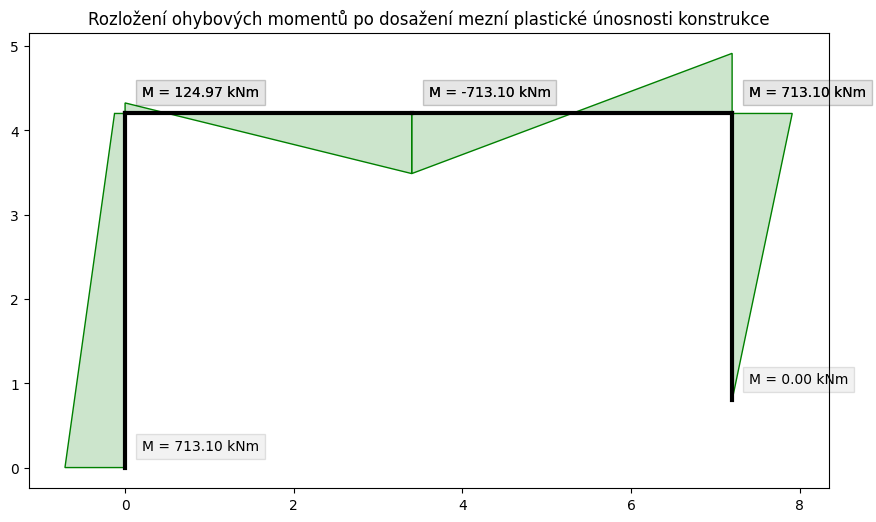

In [12]:
# plot structure
locs = np.array(locations)

fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([1, 1, 1, 1])
fig.gca().set_aspect('equal', adjustable='box')

for i, loc in enumerate(locs):
    x = loc.T[0]  # x coords for plotting
    y = loc.T[1]  # y coords for plotting
    
    n1 = loc[0]  # node coordinates of node 1
    n2 = loc[1]  # node coordinates of node 2
    dx, dy = n2 - n1

    L = np.linalg.norm(n2 - n1)  # length of member

    c = dx / L  # cosine
    s = dy / L  # sin

    TM = np.array([[c,-s],[s,c]])  # transformation matrix

    m1 = moments_prev[i][0]  # moment at node 1
    m2 = moments_prev[i][-1]  # moment at node 2

    scale = 1e-3 # factor for bending moment diagram
    
    pt1 = np.array([0,0])
    pt2 = np.array([0,m1 * scale])
    pt3 = np.array([L,m2 * scale])
    pt4 = np.array([L,0])
    
    #Rotated coords
    pt1r = TM@pt1
    pt2r = TM@pt2
    pt3r = TM@pt3
    pt4r = TM@pt4

    #Shift in BMD position to match element
    x_shift = n1[0]  # x-coord of first node
    y_shift = n1[1]  # y-coord of first node

    #Final shifted and rotated coords
    xr = np.array([pt1r[0], pt2r[0], pt3r[0], pt4r[0]]) + x_shift
    yr = np.array([pt1r[1], pt2r[1], pt3r[1], pt4r[1]]) + y_shift

    ax.add_patch(patch.Polygon(xy = list(zip(xr,yr)),facecolor='green', alpha=0.2))
    ax.add_patch(patch.Polygon(xy = list(zip(xr,yr)),fill=None, edgecolor='green', alpha=1))

    # plot labels
    label_1 = f"M = {m1:.2f} kNm"
    label_2 = f"M = {m2:.2f} kNm"

    offset = 0.2
    
    plt.text(n1[0]+offset, n1[1]+offset, label_1, bbox=dict(facecolor='grey', alpha=0.1))
    plt.text(n2[0]+offset, n2[1]+offset, label_2, bbox=dict(facecolor='grey', alpha=0.1))
    
    ax.plot(x, y, 'k', lw=3)

plt.title('Rozložení ohybových momentů po dosažení mezní plastické únosnosti konstrukce')
plt.show()

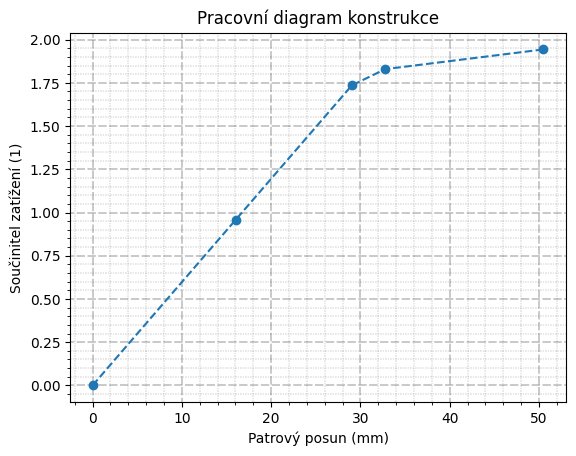

In [13]:
plt.plot(u_floor*1e3, load_factors, '--o')
plt.title("Pracovní diagram konstrukce")
plt.ylabel("Součinitel zatížení (1)")
plt.xlabel("Patrový posun (mm)")

plt.grid(which="major", linestyle=(10, (20, 6)), color='black', lw=0.3)
plt.minorticks_on()
plt.grid(which="minor", linestyle=(0, (1, 3)), color='black', lw=0.3)
plt.show()

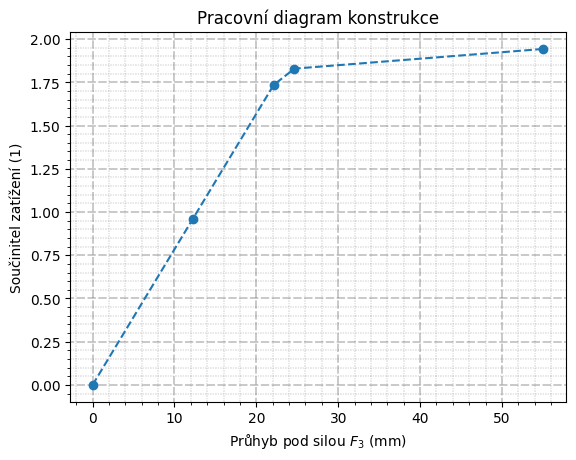

In [14]:
plt.plot(abs(w_3)*1e3, load_factors, '--o')
plt.title("Pracovní diagram konstrukce")
plt.ylabel("Součinitel zatížení (1)")
plt.xlabel("Průhyb pod silou $F_3$ (mm)")

plt.grid(which="major", linestyle=(10, (20, 6)), color='black', lw=0.3)
plt.minorticks_on()
plt.grid(which="minor", linestyle=(0, (1, 3)), color='black', lw=0.3)
plt.show()